# CSSEGISandData/COVID-19
* Johns Hopkins UniversityのGitHubからCOVID-19の感染者数のデータを取得
* 累積感染者数、新規感染者数、死者数、回復者数、現行感染者数の国別データをExcelファイルで出力

https://github.com/CSSEGISandData/COVID-19

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
countries = pd.read_csv('countries.csv')

In [3]:
countries.head()

,Country/Region,Japanese,Code
0,Afghanistan,アフガニスタン,AF
1,Albania,アルバニア,AL
2,Algeria,アルジェリア,DZ
3,Andorra,アンドラ,AD
4,Angola,アンゴラ,AO


## Confirmed Global（累積感染者数）

In [4]:
confirmed = pd.read_csv(
    'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [5]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,24,40,40,74,84,94,110,110,120,170
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,76,89,104,123,146,174,186,197,212,223
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,139,201,230,264,302,367,409,454,511,584
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,88,113,133,164,188,224,267,308,334,370
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,3,3,3,4,4,5,7,7


In [6]:
confirmed_df = confirmed.groupby('Country/Region').sum().drop(['Lat','Long'],axis=1)

In [7]:
confirmed_df.columns = pd.to_datetime(confirmed_df.columns,format='%m/%d/%y').strftime('%Y-%m-%d')

In [8]:
confirmed_df.head()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,24,40,40,74,84,94,110,110,120,170
Albania,0,0,0,0,0,0,0,0,0,0,...,76,89,104,123,146,174,186,197,212,223
Algeria,0,0,0,0,0,0,0,0,0,0,...,139,201,230,264,302,367,409,454,511,584
Andorra,0,0,0,0,0,0,0,0,0,0,...,88,113,133,164,188,224,267,308,334,370
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,3,3,3,4,4,5,7,7


In [9]:
confirmed_df.sort_values(confirmed_df.columns[-1],ascending=False).sort_index(axis=1,ascending=False).to_csv(
    'confirmed_global_'+datetime.today().strftime('%Y%m%d')+'.csv',encoding='utf-8-sig')

## New Cases Global（新規感染者数）

In [10]:
new_df = confirmed_df.diff(axis=1)

In [11]:
new_df.head()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,16.0,0.0,34.0,10.0,10.0,16.0,0.0,10.0,50.0
Albania,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,13.0,15.0,19.0,23.0,28.0,12.0,11.0,15.0,11.0
Algeria,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,49.0,62.0,29.0,34.0,38.0,65.0,42.0,45.0,57.0,73.0
Andorra,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,25.0,20.0,31.0,24.0,36.0,43.0,41.0,26.0,36.0
Angola,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,0.0


In [12]:
new_df.sort_values(new_df.columns[-1],ascending=False).sort_index(axis=1,ascending=False).to_csv(
    'new_cases_global_'+datetime.today().strftime('%Y%m%d')+'.csv',encoding='utf-8-sig')

## Deaths Global（死者数）

In [13]:
deaths = pd.read_csv(
    'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [14]:
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,0,1,1,1,2,4,4,4,4,4
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2,2,4,5,5,6,8,10,10,11
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,15,17,17,19,21,25,26,29,31,35
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,0,1,1,1,1,3,3,3,6,8
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2


In [15]:
deaths_df = deaths.groupby('Country/Region').sum().drop(['Lat','Long'],axis=1)

In [16]:
deaths_df.columns = pd.to_datetime(deaths_df.columns,format='%m/%d/%y').strftime('%Y-%m-%d')

In [17]:
deaths_df.head()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,2,4,4,4,4,4
Albania,0,0,0,0,0,0,0,0,0,0,...,2,2,4,5,5,6,8,10,10,11
Algeria,0,0,0,0,0,0,0,0,0,0,...,15,17,17,19,21,25,26,29,31,35
Andorra,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,3,3,3,6,8
Angola,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2


In [18]:
deaths_df.sort_values(deaths_df.columns[-1],ascending=False).sort_index(axis=1,ascending=False).to_csv(
    'deaths_global_'+datetime.today().strftime('%Y%m%d')+'.csv',encoding='utf-8-sig')

## Recovered Global（回復者数）

In [19]:
recovered = pd.read_csv(
    'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [20]:
recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1,1,1,1,2,2,2,2,2,2
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2,2,2,10,17,17,31,31,33,44
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,32,65,65,24,65,29,29,31,31,37
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,10
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
recovered_df = recovered.groupby('Country/Region').sum().drop(['Lat','Long'],axis=1)

In [22]:
recovered_df.columns = pd.to_datetime(recovered_df.columns,format='%m/%d/%y').strftime('%Y-%m-%d')

In [23]:
recovered_df.head()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,2,2,2,2,2,2
Albania,0,0,0,0,0,0,0,0,0,0,...,2,2,2,10,17,17,31,31,33,44
Algeria,0,0,0,0,0,0,0,0,0,0,...,32,65,65,24,65,29,29,31,31,37
Andorra,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,10
Angola,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
recovered_df.sort_values(recovered_df.columns[-1],ascending=False).sort_index(axis=1,ascending=False).to_csv(
    'recovered_global_'+datetime.today().strftime('%Y%m%d')+'.csv',encoding='utf-8-sig')

## Compare DataFrame Shapes

In [25]:
confirmed_df.shape

(178, 69)

In [26]:
deaths_df.shape

(178, 69)

In [27]:
recovered_df.shape

(178, 69)

In [28]:
confirmed_df[~confirmed_df.index.isin(deaths_df.index)]

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30
Country/Region,,,,,,,,,,,,,,,,,,,,,


In [29]:
confirmed_df[~confirmed_df.index.isin(recovered_df.index)]

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30
Country/Region,,,,,,,,,,,,,,,,,,,,,


In [30]:
deaths_df[~deaths_df.index.isin(recovered_df.index)]

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30
Country/Region,,,,,,,,,,,,,,,,,,,,,


## Active Global（現行感染者数）

In [31]:
active_df = confirmed_df - deaths_df - recovered_df

In [32]:
active_df.head()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,23,38,38,72,80,88,104,104,114,164
Albania,0,0,0,0,0,0,0,0,0,0,...,72,85,98,108,124,151,147,156,169,168
Algeria,0,0,0,0,0,0,0,0,0,0,...,92,119,148,221,216,313,354,394,449,512
Andorra,0,0,0,0,0,0,0,0,0,0,...,87,111,131,162,186,220,263,304,327,352
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,3,3,3,4,4,5,5,5


In [33]:
active_df.sort_values(active_df.columns[-1],ascending=False).sort_index(axis=1,ascending=False).to_csv(
    'active_global_'+datetime.today().strftime('%Y%m%d')+'.csv',encoding='utf-8-sig')

## Total

In [34]:
total_df = pd.concat([confirmed_df.sum(),new_df.sum().astype(int),deaths_df.sum(),recovered_df.sum(),active_df.sum()],axis=1)

In [35]:
total_df.columns = ['confirmed','new cases','deaths','recovered','active']

In [36]:
total_df.sort_index(ascending=False).head()

,confirmed,new cases,deaths,recovered,active
2020-03-30,782365,62248,37582,164566,580217
2020-03-29,720117,59411,33925,149082,537110
2020-03-28,660706,67415,30652,139415,490639
2020-03-27,593291,63700,27198,130915,435178
2020-03-26,529591,61938,23970,122150,383471


In [37]:
total_df.sort_index(ascending=False).to_csv('total_global_'+datetime.today().strftime('%Y%m%d')+'.csv',encoding='utf-8-sig')

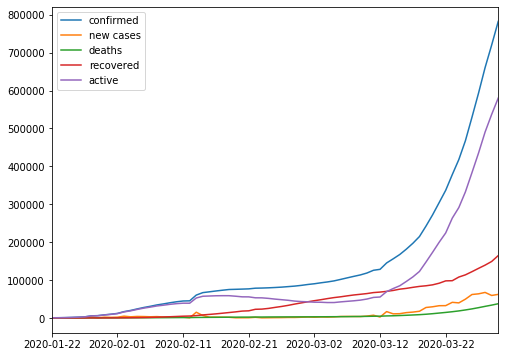

In [38]:
fig, ax = plt.subplots(figsize=(8,6))
total_df.plot(ax=ax)

## Excel Output

* 国名を日本語に変換

In [39]:
confirmed_df.index = confirmed_df.index.map(countries.set_index('Country/Region').Japanese.to_dict())

In [40]:
new_df.index = new_df.index.map(countries.set_index('Country/Region').Japanese.to_dict())

In [41]:
deaths_df.index = deaths_df.index.map(countries.set_index('Country/Region').Japanese.to_dict())

In [42]:
recovered_df.index = recovered_df.index.map(countries.set_index('Country/Region').Japanese.to_dict())

In [43]:
active_df.index = active_df.index.map(countries.set_index('Country/Region').Japanese.to_dict())

In [44]:
total_df.columns = ['累積感染者数','新規感染者数','死者数','回復者数','現行感染者数']

In [45]:
latest = pd.concat([confirmed_df[[confirmed_df.columns[-1]]],
          new_df[[new_df.columns[-1]]].astype(int),
          deaths_df[[deaths_df.columns[-1]]],
          recovered_df[[recovered_df.columns[-1]]],
          active_df[[active_df.columns[-1]]]],axis=1)

In [46]:
latest.columns = ['累積感染者数','新規感染者数','死者数','回復者数','現行感染者数']

In [47]:
latest.sort_values('累積感染者数',ascending=False).head()

,累積感染者数,新規感染者数,死者数,回復者数,現行感染者数
Country/Region,,,,,
米国,161807,20921,2978,5644,153185
イタリア,101739,4050,11591,14620,75528
スペイン,87956,7846,7716,16780,63460
中国,82198,76,3308,75923,2967
ドイツ,66885,4790,645,13500,52740


In [48]:
with pd.ExcelWriter('covid19.xlsx') as writer:
    confirmed_df.sort_values(confirmed_df.columns[-1],ascending=False).sort_index(axis=1,ascending=False).to_excel(
        writer, sheet_name='累積感染者数')
    new_df.sort_values(new_df.columns[-1],ascending=False).sort_index(axis=1,ascending=False).to_excel(
        writer,sheet_name='新規感染者数')
    deaths_df.sort_values(deaths_df.columns[-1],ascending=False).sort_index(axis=1,ascending=False).to_excel(
        writer,sheet_name='死者数')
    recovered_df.sort_values(recovered_df.columns[-1],ascending=False).sort_index(axis=1,ascending=False).to_excel(
        writer,sheet_name='回復者数')
    active_df.sort_values(active_df.columns[-1],ascending=False).sort_index(axis=1,ascending=False).to_excel(
        writer,sheet_name='現行感染者数')
    total_df.sort_index(ascending=False).to_excel(writer,sheet_name='合計')
    latest.sort_values('累積感染者数',ascending=False).to_excel(writer,sheet_name='最新')